In [3]:
%matplotlib inline

In [4]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [17]:
class HamiltonianPendulum():
    """
    Pendulum class implements the parameters and Hamilton's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    omega_0 : float
        natural frequency of the pendulum (\sqrt{g/l} where l is the 
        pendulum length) 
    mass : float
        mass of pendulum

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L=1., mass=1., g=1.
                ):
        self.L1 = L
        self.L2 = L
        self.g = g
        self.omega_0 = np.sqrt(g/L)
        self.m1 = mass
        self.m2 = mass
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand sides of Hamilton's eqs
        [dq/dt dp/dt] --> [dphi/dt dp_phi/dt]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 2-component vector with y[0] = phi1(t) and y[2] = p_phi1(t), y[1] = phi2(t) and y[3] = p_phi2(t)
            
        Returns
        -------
        
        """
        ## equations for the double pendulum as a Hamiltonian
        C1 = (y[1]*y[3]*np.sin(y[0]-y[2]))/(self.L1*self.L2*(self.m1+self.m2*(np.sin(y[0]-y[2]))**2))
        C2 = (self.L2**2*self.m2*y[1]**2+self.L1**2*(self.m1+self.m2)*y[3]**2-self.L1*self.L2*self.m2*y[1]*y[3]*np.cos(y[0]-y[2]))*np.sin(2*(y[0]-y[2]))/(2*self.L2**2*self.L1**2*(self.m1+self.m2*(np.sin(y[0]-y[2]))**2)**2)
        
        return [(self.L2*y[1] + self.L1*y[3]*np.cos(y[0]-y[2]))/(self.L1**2*self.L1*(self.m1+self.m2*(np.sin(y[0]-y[2]))**2)), 
                -(self.m1+self.m2)*self.g*self.L1*np.sin(y[0])-C1+C2,
                (self.L1*(self.m1+self.m2) * y[3] -self.L2*y[1]*self.m2*np.cos(y[0]-y[2]))/(self.L1*self.L2**2*self.m2*(self.m1+self.m2*(np.sin(y[0]-y[2]))**2)),
                -self.m2*self.g*self.L2*np.sin(y[2])+C1-C2
               ]
    
    
    def solve_ode(self, t_pts, q_1, p_1,q_2,p_2, 
                  abserr=1.0e-10, relerr=1.0e-10):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [q_1, p_1, q_2, p_2] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        q1, p1, q2, p2 = solution.y

        return q1, p1, q2, p2

In [18]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [19]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [20]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
p_phi_vs_time_labels = (r'$t$', r'$p_\phi(t)$')
phase_space_labels = (r'$\phi$', r'$p_\phi$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L = 1.
g = 1.
mass = 1.

# Instantiate a pendulum 
p1 = HamiltonianPendulum(L=L, g=g, mass=mass)

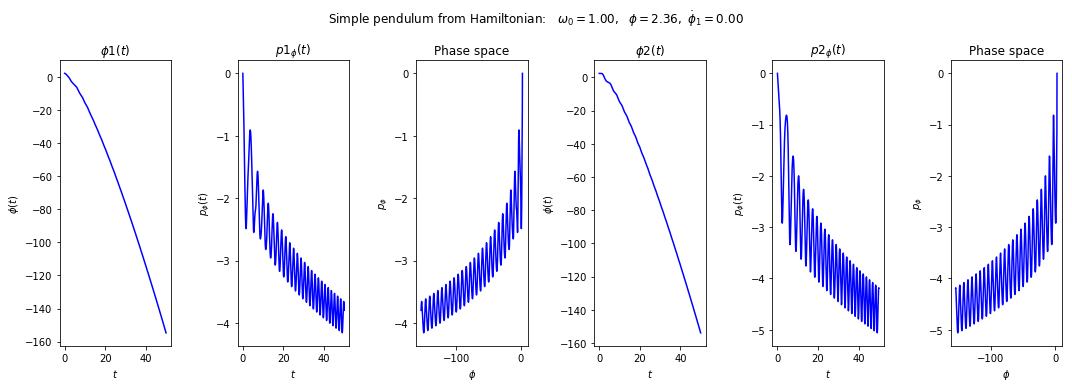

In [35]:
# both plots: same initial conditions
phi_1 = phi_2 = (3./4.)*np.pi
phi_dot_1 = phi_dot_2 = 0.0
p_phi_1 = p1.m1 * p1.L1**2 * phi_dot_1
p_phi_2 = p1.m2 * p1.L2**2 * phi_dot_1

phi1, p_phi1, phi2, p_phi2 = p1.solve_ode(t_pts, phi_1, p_phi_1, phi_2, p_phi_2)


# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Simple pendulum from Hamiltonian:  ' + \
                rf' $\omega_0 = {p1.omega_0:.2f},$' + \
                rf'  $\phi = {phi_1:.2f},$' + \
                rf' $\dot\phi_1 = {phi_dot_1:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi1 plot 
ax_a = fig.add_subplot(1,6,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop],
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\phi1(t)$', 
            ax=ax_a)    
                              
# second plot: p1_phi plot 
ax_b = fig.add_subplot(1,6,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], p_phi1[start : stop], 
            axis_labels=p_phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$p1_\phi(t)$', 
            ax=ax_b)    

# third plot: phase space plot  
ax_c = fig.add_subplot(1,6,3)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi1[start : stop], p_phi1[start : stop],
            axis_labels=phase_space_labels, 
            color='blue',
            label=None, 
            title='Phase space', 
            ax=ax_c)  
ax_d = fig.add_subplot(1,6,4)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi2[start : stop],
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\phi2(t)$', 
            ax=ax_d)    
                              
# fifth plot: p2_phi plot 
ax_e = fig.add_subplot(1,6,5)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], p_phi2[start : stop], 
            axis_labels=p_phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$p2_\phi(t)$', 
            ax=ax_e)    

# sixth plot: phase space plot  
ax_f = fig.add_subplot(1,6,6)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi2[start : stop], p_phi2[start : stop],
            axis_labels=phase_space_labels, 
            color='blue',
            label=None, 
            title='Phase space', 
            ax=ax_f)  

fig.tight_layout()
fig.savefig('simple_pendulum_Hamilton.png', bbox_inches='tight') 